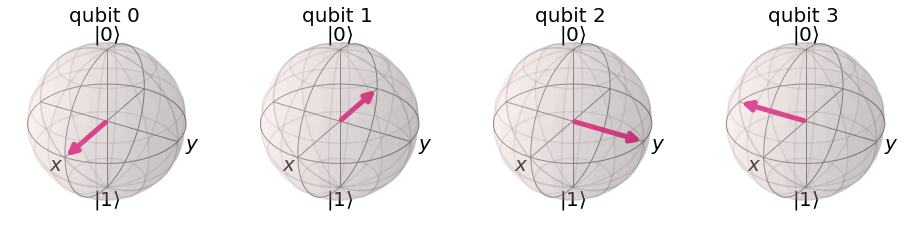

In [4]:
#Exercise 2.1
from qiskit import QuantumCircuit,execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram 
from qiskit.quantum_info import Statevector
import math
qc = QuantumCircuit(4,4) 
qc.initialize([1/math.sqrt(2), 1/math.sqrt(2)],0)
qc.initialize([1/math.sqrt(2), -1/math.sqrt(2)],1)
qc.initialize([1/math.sqrt(2), 1j/math.sqrt(2)],2)
qc.initialize([1/math.sqrt(2), -1j/math.sqrt(2)],3)
state = Statevector.from_instruction(qc) 
state.draw('bloch')

In [5]:
qc.measure([0,1,2,3],[0,1,2,3])
print(qc)

      ┌─────────────────────────────┐ ┌─┐         
q_0: ─┤ Initialize(0.70711,0.70711) ├─┤M├─────────
      ├─────────────────────────────┴┐└╥┘┌─┐      
q_1: ─┤ Initialize(0.70711,-0.70711) ├─╫─┤M├──────
      ├──────────────────────────────┤ ║ └╥┘┌─┐   
q_2: ─┤ Initialize(0.70711,0.70711j) ├─╫──╫─┤M├───
     ┌┴──────────────────────────────┤ ║  ║ └╥┘┌─┐
q_3: ┤ Initialize(0.70711,-0.70711j) ├─╫──╫──╫─┤M├
     └───────────────────────────────┘ ║  ║  ║ └╥┘
c: 4/══════════════════════════════════╩══╩══╩══╩═
                                       0  1  2  3 


Counts: {'0001': 56, '1101': 64, '1011': 55, '1110': 49, '1000': 57, '1001': 60, '1010': 61, '1111': 74, '0010': 60, '0110': 61, '0100': 68, '0011': 70, '0000': 70, '0111': 57, '0101': 69, '1100': 69}


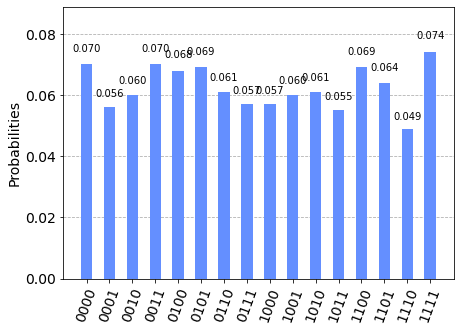

In [6]:
simulator=AerSimulator()
job=execute(qc, backend=simulator, shots=1000) 
result=job.result()
counts=result.get_counts(qc) 
print("Counts:",counts)
plot_histogram(counts)